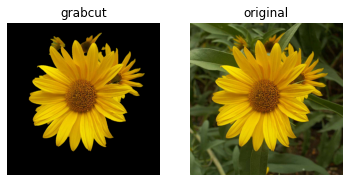

In [1]:
# Grabcut algorithm

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('flower.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,700,700)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.subplot(121),
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),
plt.title('grabcut'),
plt.axis('off')
plt.subplot(122),
plt.imshow(cv2.cvtColor(cv2.imread('flower.jpg'),cv2.COLOR_BGR2RGB))
plt.title('original'),
plt.axis('off')
plt.show()

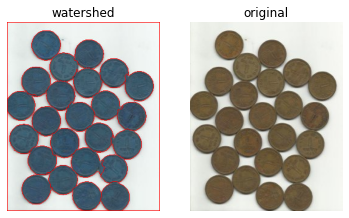

In [2]:
# Watershed Algorithm

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('water_coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 5)
sure_bg = cv2.dilate(opening,kernel,iterations = 3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret,markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(121),
plt.imshow(img),
plt.title('watershed'),
plt.axis('off')
plt.subplot(122),
plt.imshow(cv2.cvtColor(cv2.imread('water_coins.jpg'),cv2.COLOR_BGR2RGB))
plt.title('original'),
plt.axis('off')
plt.show()